In [ ]:
## 제2절 T-test
## 1. T-test의 개념
# t-test는 검정통계량이 귀무가설 하에서 t-분포를 따르는 통계적 가설 검정 방법이다.
# 어느 특정 집단의 평균의 값을 추정하거나 차이를 검정할 때 사용할 수 있다. 
# 종속변수는 평균값을 가질 수 있는 연속형 변수여야 하고, 독립변수는 성별, 종교, 부서와 같은 범주형변수여야 한다.

In [ ]:
## 2.일표본 t-test
# 개념
# 단일모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교한다.
# 가정 : 모집단의 구성요소들이 정규분포를 이룬다는 가정이다.
#  - 종속변수는 연속형이어야 한다.
#  - 검증하고자 하는 기준값이 있어야 한다.

 cats 데이터에서 고양이들의 평균몸무게가 2.6kg인지 아닌지 통계적 검정을 수행하고, 결과를 해석해보자(양측검정, 유의수준 : 0.05).

In [2]:
import pandas as pd
cats=pd.read_csv('C:/Users/A202112006/Desktop/py/data/cats.csv')
cats.tail()

,Sex,Bwt,Hwt
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4
143,M,3.9,20.5


Bwt 컬럼은 고양이의 몸무게를 의미하고, Hwt는 고양이의 길이를 의미한다. 
cats의 데이터의 정보를 info로 확인해준다. 

In [3]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


shapiro test를 통해 데이터의 정규성을 검정한다. 고양이의 몸무게를 검정하므로 고양이의 몸무게만 추출하여 shapiro test를 진행해야 한다. 

In [1]:
import scipy.stats as stats
from scipy.stats import shapiro
mu =2.6
shapiro(cats['Bwt'])

NameError: name 'cats' is not defined

[결과해석]
첫번째 값 (검정통계치) : 0.95187
두번째 값 (p-value) : 6.730e-05
유의수준보다 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다. 즉, cats 데이이터의 Bwt 변수는 정규분포를 따르지 않는다. 데이터가 정규분포를 따르지 않으므로 wilcox test 로 t-test를 진행한다. 만약, 정규분포를 따른다면 stats.ttest_1samp(cats.Bwt, popmean=mu)를 사용하면 된다. 

In [5]:
stats.wilcoxon(cats.Bwt - mu , alternative='two-sided')
# p-value는 유의수준 0.05보다 작으므로 "고양이의 몸무게가 2.6kg이다" 라는 귀무가설을 기각할 수 있다.
# 즉, 유의수준 0.05하에 고양이의 평균 몸무게는 2.6kg라고 할 수 없다.

WilcoxonResult(statistic=3573.0, pvalue=0.025245202948140935)

Text(0, 0.5, 'Count')

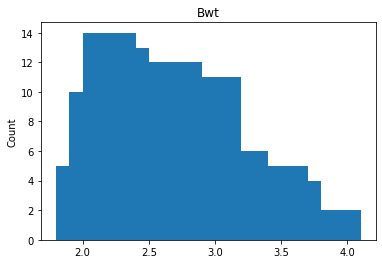

In [6]:
import matplotlib.pyplot as plt
cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort=False)
width =0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values,width)
plt.title('Bwt')
plt.ylabel('Count')


In [7]:
## 정규성 만족시
stats.ttest_1samp(cats.Bwt, popmean=mu)

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723617)

In [ ]:
## 3. 대응표본 t-test
# 개념
# - 단일모집단에 대해 어떠한 처리를 가했을 때, 처리 전후에 따른 평균의 차이를 비교할 때 사용한다.
# - 표본 내에 개체들에 대해 두번의 측정을 한다.(같은 집단이므로 등분산성 만족)
# - 모집단의 관측값이 정규성을 만족해야 한다는 가정이 있다.

In [ ]:
# 10명의 환자 대상 수면영양제 복용 전과 후의 수면시간을 측정하였다.  
# 영양제의 효과가 있는지를 판단해보자. 
# 표본이 전규성을 만족한다는 가정하에 검정 수행.
# 만족하지 않으면 Wilcoxon-test 진행. 유의수준 0.05

In [2]:
# 데이터 불러오기 및 확인 
import pandas as pd 
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data.tail()

,before,after
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [3]:
data02 = pd.melt(data, var_name='names', value_name='values' )
data02.tail()

,names,values
15,after,3
16,after,6
17,after,8
18,after,6
19,after,5


In [4]:
## 3.1 정규성 검증 # 313P
import scipy.stats as stats
from scipy.stats import shapiro
shapiro(data02['values'])
# p-value가 0.05보다 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다. 
# 즉, 수면제 데이이터의 수면시간(values) 변수는 정규분포를 따르지 않는다.

ShapiroResult(statistic=0.9596133232116699, pvalue=0.5361530184745789)

해당 데이터를 검정하기 위한 가설 수립한다.  <br> <br>
귀무가설(H0) <br>
수면제 복용 전과 후의 수면시간 차이는 없다. <br>
대립가설(H1)<br>
수면제 복용 전과 후의 수면시간 차이는 있다. <br>


In [7]:
stats.ttest_rel(data['after'],data['before'],alternative='greater')
# [결과해석]
# p-value가 0.05보다 작으므로 '수면영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 늘었다'는
# 결론을 낼 수 있다. 

SyntaxError: invalid syntax (2864853398.py, line 3)

In [6]:
data.mean()

before    4.3
after     5.3
dtype: float64

In [ ]:
## 4.독립표본 t-test
# ㅁ 개념
# - 두개의 독립된 모집단의 평균을 비교할 때 사용한다.
# - 그러므로 모집단, 모수, 표본이 모두 두개씩 존재한다.(등분산성 가정을 해주어야 함)
# - 가정
#  . 두 모집단은 정규성을 만족해야 한다.
#  . 두 모집단의 분산이 서로 같아야 한다.(등분산성 가정)
# https://junsik-hwang.tistory.com/8

In [10]:
import pandas as pd
cats=pd.read_csv('C:/Users/A202112006/Desktop/py/data/cats.csv')
female = cats.loc[cats.Sex =='F', 'Bwt']
male = cats.loc[cats.Sex =='M', 'Bwt']
cats.tail()

,Sex,Bwt,Hwt
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4
143,M,3.9,20.5


In [11]:
## 4.1 정규성 검증
import scipy.stats as stats
from scipy.stats import shapiro
shapiro(cats['Bwt'])
# p-value가 0.05보다 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다. 
# 즉, cats 데이이터의 Bwt 변수는 정규분포를 따르지 않는다.

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730228778906167e-05)

In [18]:
## 4.2 윌콕슨의 순위합 검정
# 정규성을 따르지 않아서 윌콕슨 순위합 검정 진행
stats.ranksums(male, female)

# H0/귀무 : A와 B는 다르지 않다.(같다)
# H1/대립 : A와 B는 다르다.

# P-value가 0.05보다 작아서 귀무가설을 기긱한다.
# 즉, 유의수준 0.05하에서 수컷과 암컷 고양이의 몸무게 차이는 있다.

RanksumsResult(statistic=6.484649068728496, pvalue=8.893855174450822e-11)

In [14]:
print(male.info())
print(female.info())

<class 'pandas.core.series.Series'>
Int64Index: 97 entries, 47 to 143
Series name: Bwt
Non-Null Count  Dtype  
--------------  -----  
97 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 47 entries, 0 to 46
Series name: Bwt
Non-Null Count  Dtype  
--------------  -----  
47 non-null     float64
dtypes: float64(1)
memory usage: 752.0 bytes
None


In [21]:
# python 등분산성 : 레빈검정
print('median')
print(stats.levene(female, male, center = 'median') )
print('mean')
print(stats.levene(female, male, center = 'mean') )

# H0/귀무 : 모든 집단의 분산이 같다.
# H1/대립 : 적어도 하나의 집단에서 분산이 다르다.
# P-value가 0.05보다 작아서 귀무가설을 기긱한다.
# 즉, 유의수준 0.05하에서 수컷과 암컷 고양이의 몸무게는 분산이 다르다.

median
LeveneResult(statistic=19.43101190877999, pvalue=2.043528525518961e-05)
mean
LeveneResult(statistic=17.201368589463517, pvalue=5.759437452845481e-05)


In [22]:
# 독립표본 t-test
stats.ttest_ind(female, male, equal_var=False) # 등분산성 NO : equal_var=False

# H0/귀무 : A와 B의 평균은 같다.
# H1/대립 : A와 B의 평균은 같지 않다(다르다).
# P-value가 0.05보다 작아서 귀무가설을 기긱한다.
# 즉, 유의수준 0.05하에서 수컷과 암컷 고양이의 몸무게는 같지 않다.

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [23]:
print(female.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


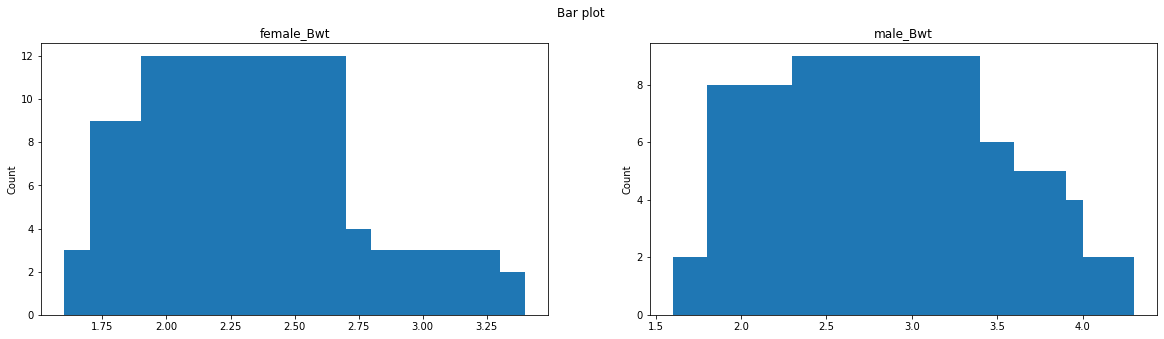

In [25]:
import matplotlib.pyplot as plt
female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)
fig, axs = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Bar plot')
width =0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()
